---
# TP2 overtone CORR : Effet overtone en temps réel
---
|    [Readme du TP](../README.ipynb)       | Sujet | Corrigé |
|--------|-------|---------|
|Python  | [sujet python](./tp2_overtone_python.ipynb) | [corrigé python](./tp2_overtone_python_corr.ipynb) |
|Octave  | [sujet octave](./tp2_overtone.ipynb) | [corrigé octave](./tp2_overtone_corr.ipynb) |


On désire appliquer ce filtre pour effecteur le même effet d'overtone que la chanteuse Ana Maria Hefele. Regardez l'explication sur 
[![](https://i.pinimg.com/originals/fa/fe/6d/fafe6d300d6fa568aed43b31fd3bc67d.jpg)](https://www.youtube.com/watch?v=UHTF1-IhuC0)




# 1 - Un peu de solfège
---

Nous avons besoin de faire le lien entre les fréquences et les notes (regardez le piano de la vidéo et l'échellen des fréquences). Les Anglais ont remplacé notre DO-RE-MI par les lettres de l'alphabet A-B-C en commençant avec A pour le LA ! Ce serait trop simple autrement...


 ...| DO| RE| MI| FA|SOL| LA| SI| DO| ...
:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:
 ...| C | D | E | F | G | A | B | C | ...  

### Octave

En solfège, une octave correspond à une miltiplication par 2 de la fréquence et au fait de passer d'un DO au DO suivant par exemple. Donc tous les multiples de fréquence en puissance de 2 sonneront en harmonie et donneront la même note mais à des octaves différentes.

### Notes harmoniques

Les fréquences multiples qui ne sont pas en puissance de deux apparaissent naturellement (périodicité et séries de Fourier) et les premièrs harmoniques qui ne sont pas des puissances de deux donnent des notes qui sonnent différemment de la note de départ.

### Demi-ton et gamme tempérée

Les musiciens occidentaux ont convergés vers "la gammme tempérée" qui décompose une octave (multiplication par deux) en 12 demi-tons qui correspondent ainsi chacun à une multiplication par :  
demi-ton $\quad \leftrightarrow \quad \times\; 2^{\frac{1}{12}}\approx \times\; 1.0595 \equiv +5.95 \% \approx +\frac{3}{12}\text{dB}= + 0.25$ dB.  

On obtient ainsi **une échelle de fréquence logarithmique** qui décompose en 12 demi-tons le passage à l'octave (doublement de fréquence). Un barreau de référrence de cette échelle est le **LA de la 4ᵉ octave noté "LA 4" officiellement à 440 Hz**.


### Attention aux dB !

On rappelle que +3dB correspondent environ à une octave soit $\times\;2$ (car $10 \log{3}\approx 2$) et que 10dB exactement à x10.  

> **20dB sont x100 et non pas x10 ne vous trompez pas !** 

Lorsque l'on dit qu'un gain x10 fait 20dB on sous-entend **+20dB de ratio de puissance.** Comme x100 en puissance font x10 en amplitude puisque $P=U^2/R$ l'embrouille est vite venue...

> Attention `log` est en base 2 avec octave/matlab : il n'y pas de "ln" !  
> Préférez utiliser explicitement `log10` et ̀`log2`.  
> De manière indépendante du langage, on peut toujours choisir sa base en faisant `log(x)/log(B)` où B est la base choisie.

Ici les dB expriment un ratio entre les fréquences des différentes notes. Comme l'échelle de fréquence des notes est logarithlique, augmenter d'un demi-ton sera toujours une augmentation de fréquence de +0.25dB. 

### dB acoustiques
Ne pas confondre avec les dB exprimant le ratio de puissance acoustique. Il exprime le rapport **de puissance** acoustique (on parle d'intensité sonore) avec une référence qui est l'intensité à la limite du seuil audible :  
> $0\text{dB} \leftrightarrow 1\text{pW}/m^2$ d'intensité acoustique  
> $\leftrightarrow  20 \mu P $ de pression acoustique  
> $\leftrightarrow$ "Bruissement de la brise dans les champs de blé" 

Comme l'oreille humaine est plus ou moins sensible à différentes fréquences (très sensible autour de 1KHz) un facteur de correction peut être apporté en fonction de la fréquence. C'est donc bien un filtre qui est apporté au spectre d'intensité pour se rapprocher de la notion "d'intensité ressentie". Le standard donne 3 filtres de A à C et l'unité de mesure associée est communément notée dBA, dBB, dBC. 

In [1]:
clear all; close all; clc;
LA4 = 440;

%% VOTRE CODE demiton= ... et demiton_dB...
% multiplier par demiton doit augmenter  d'un demi-ton
% ^ permet de calculer une puissance non entière
demiton = 2^(1/12) 
demiton_dB = 10*log10(demiton)
demiton_log2 = 1/12;
quart_de_ton = sqrt(demiton); 

%% VOTRE CODE LA4diese=...
% LA + 1demiton = LA#
LA4diese = LA4 * demiton 
% LA + 2demiton = SI
SI4 = LA4 * demiton^2
% Et oui! SI +1demiton = DO (octave audessus)
DO5 = LA4 * demiton^3
% Descendez le DO5 de 2 octaves 
DO3 = DO5/4  
DO7 = DO5*4

demiton =  1.0595
demiton_dB =  0.25086
LA4diese =  466.16
SI4 =  493.88
DO5 =  523.25
DO3 =  130.81
DO7 =  2093.0


### Les harmoniques qui sonnent bien : tierce et quinte

Lorsque l'on chante (un DO 4 par exemple) le signal de la voix est quasi-périodique à la fréquence DO4 et comporte naturellement des multiples (Séries de Fourier oblige !). On distingue :
  - $F_0$ (ici DO4) : La **fondamentale** (ou harmonique de rang 1)  
  - $F_1 = 2 . F_0$ (ici DO5) : Le **premier harmonique** (rang 2) donne la même note à l'octave supérieure
  - $F_2 = 3 . F_0$ (ici SOL5) : Le deuxième harmonique (rang 3) **quinte juste** est ici un SOL qui "sonne" dans l'octave supérieure différemment du DO. 
  - $F_3 = 4 . F_0$ (ici DO 6) : Le troisième harmonique (rang 4) même note deux octaves au-dessus
  - $F_4 = 5 . F_0$ (ici MI 6) : Le quatrième harmonique (rang 5) **tierce** est ici un MI qui sonne différemment du DO deux octaves au-dessus
  
### Gamme de notes et degrés

La fondamentale n'est pas toujours un DO et on peut vouloir décaler les tons d'une chanson en partant d'une autre note. On parle plutôt en **degrés** où la note de degré I est la fondamentale et les autres degrés sont relatifs à cette note. On répartit ainsi 7 degrés de I à VII dans une octave.

On peut monter la gamme majeure de DO en partant du DO et en faisant des écarts de 2 demi-tons et **parfois un seul demi-ton !** :


Degrés      | I | | II | |  III | IV | | V    |   | VI |  | VII| I   | ...
:----------:|:-:|-|:--:|-|-----:|:---|-|:----:|:-:|:--:|--|---:|:----|:---:
Demitons    | 0 |1| 2  |3|   4  |  5 |6|  7   | 8 | 9  |10| 11 | 12=0| 13=1
Gamme DO maj| DO| | RE | | MI   | FA | | SOL  |   | LA |  | SI | DO  | ...
Gamme FA maj| FA| | SOL| | LA   | LA#| |  DO  |   | RE |  | MI | FA  | ...

La gamme est dite majeure car, elle respecte les intervales "ton-ton-demiton-ton-ton-ton-demiton" entre chaques degrés. Cela est culturel et d'autres gammes existent bien sûr.

La gamme tempérée permet presque de représenter les harmoniques x 3 (quinte) et x 5 (tierce) fidèlement car :
 - La **tierce** à $5.F_0$ donne deux octaves en dessous $F_0<\frac{5.F_0}{4}<2.F_0$ une note de la même octave que la fondamentale.  
   Cette note à $1.25 F_0$ est presque comme 4 demitons au-dessus de la fondamentale soit ${2^{\frac{1}{12}}}^4 . F_0 \approx 1.2599 F_0 $.  
   On la nomme **tierce** car elle est de degré III.
- La **quinte** à $3.F_0$ donne une octave en dessous $\frac{3.F_0}{2}$ une note de la même octave que la fondamentale. 
  Cette note à $1.5 . F_0$ est presque 7 demi-tons au-dessus de la fondamentale soit ${2^{\frac{1}{12}}}^7 \approx 1.4983 . F_0$.  
  La **quinte** est appelée ainsi car de degré V.

Ainsi un instrument étant accordé pour jouer une gamme de DO avec la quinte juste sonnera mieux que celui accordé en gamme tempérée. L'intérêt apparait lorsque l'on veut jouer dans une autre gamme :
  - il faudrait réacorder l'instrument pour être exact ! Autrement de gros écarts de fréquences apparaissent ;
  - celui en gamme tempérée n'as pas besoin d'être réaccordé et fera globalement de petites erreurs... 


### Exercice utile pour la suite

On veut générer un vecteur de fréquences allant du DO3 (vers 131 Hz) au DO7 (vers 2093 Hz) tous les quarts de ton. On doit obtenir un tableau de 97 valeurs du genre [131, ..., 2033, 2093] environs.

> Les faibles utiliseront la fonction `logspace` (mais c'est + compliqué en fait !)  
> Les fortes feront une boucle et multiplieront par quart_de_ton  
> Les fabuleuses utiliseront la fonction log2, et le calcul vectorisé !

Choisissez une manière de faire et stockez le résulta tdans f pour vérification

In [2]:
%% Nombre de points
M = 4 * 12 * 2 +1 ; % 4 octaves * 12 demi-ton * 2 quart de tons

%% VOTRE CODE f_aible = ...
%% Le faible utilise logspace
f_aible = logspace(log10(DO3),log10(DO7), M);

%% OU BIEN VOTRE CODE f_orte=...
%% La forte utilise une boucle For
f=DO3;
for id=1:M
    f_orte(id) = f;
    f = f*quart_de_ton;
end

%% OU BIEN VOTRE CODE f_abuleuse = ...
%% La geeke utilise la fonction 'ln' 
log2_f = 0 : 1/12/2 : 4;  % *2^0 à *2^4 par quart de ton
f_abuleuse = DO3 * 2.^log2_f;

%% CHOISISSEZ f= f_aible OU f=f_orte OU f=f_abuleuse
%% Pour vérifier
f=f_aible;
if abs(f(1)-DO3)>1e-6
    disp("La première fréquence n'est pas un DO3")
elseif abs(f(end)-DO7)>1e-3
    disp("La dernière fréquence n'est pas un DO7")
elseif abs(f(end)/f(end-1)-2^(1/24))>1e-6
    disp("Ce n'est pas espacé au quart de ton")
else
    disp("Bravo, f semble bon");
end
M=length(f)

Bravo, f semble bon
M =  97


# 2 - Analyse et filtrage hors-ligne
---

On récupère le fichier son `ana_ah.wav` où un "aaaaah" est chanté sur le ton d'un DO4. On utilise la fonction `audioread`

A vous de créer un vecteur temps de la bonne lognueur ayant la même longueur que le signal `s`.

Normalisez le signal pour qu'il ait une norme infinie de 1 : $\|s\|_\infty=1$ (on peut utiliser la fonction `max`)

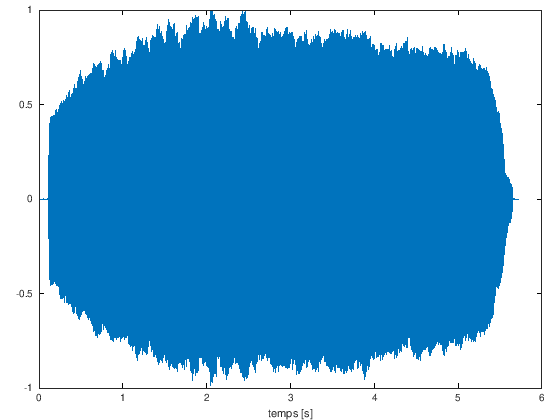

In [5]:
racine = pwd; racine = [racine(1:(findstr(racine,"Signal")+6)), "discret/tp/tp2_overtone"];cd (racine);

fich="ana_ah";

[Y,Fe]=audioread(["./",fich,".wav"]);
s=Y(:,1); % récupère que le son gauche (colonne 1) 
N=length(s);Te=1/Fe;

%% VOTRE CODE t=...
t=(1:N);t=t-1;t=t*Te;

%% VOTRE CODE s = s ... 
%% Normalisant s en norme infinie
s=s/max(abs(s));

%% VOTRE AFFICHAGE de s en fonction du  temps
plot(t,s)
xlabel("temps [s]")

%% On peut créer un fichier .wav  avec audiowrite ainsi
audiowrite(["./",fich,"_mono.wav"],s,Fe);


## Analyse directement aux fréquences intéressantes
---

Inutile de bourriner une `fft` alors que l'on ne veut voir que des fréquences "mélodiques" !

On utilise le **vecteur de fréquences en échelle log** précédant allant du D03 au DO7 tous les quarts de tons.

On construit la matrice de projection en échantillonnant $e^{i2\pi\,f\,t}$ en discret pour ces fréquences (transposée conjuguée) comme dans [VEC2 bases fréquentielles](../../cours/notebooks/VEC2_bases_frequentielles.ipynb#Base-fr%C3%A9quentielle-orthogonale-:-TFD) et dans le TD FREQ sur la TFD en matriciel [exo1 TFD corrige](../../td/FREQ_code/exo1_tfd_corr_octave.ipynb#TFD-Matricielle).

> Ouvrez une console **File -> New Console for Notebook**, et regardez si f et t sont  
> des vecteurs lignes ou colonnes.
> Testez différentes produits `f*t` `f'*t` etc. et regardez comment former la
> matrice de calcul de fft uniquement pour les fréquences voulues


In [6]:
printf(" N=%d points temporels et M=%d points fréquentiels\n",N,M);
printf("Construction de la matrice de calcul de TFD (%d x %d) pour les f en échelle log...\n",M,N);
tic;
%% VOTRE CODE W=...
% Signaux en lignes de la forme ci-dessous
% utiliser le produit matriciel d'un colonne par une ligne !
%  ----------> t
% |
% |   W = matrice conjuguée de exp(i.2.pi.f.t)
% V
W =  exp(-i*2*pi*f'*t);
toc
printf("\nCalcul de la TFD : soit %d x %d = %d Mflo (Millions d'opérations flottantes)...\n",length(f),N,N*length(f)/1e6);

tic;
%% VOTRE CODE tfd_s = ...
% Utilisant la matrice W et le signal s pour 
% obtenir les "projections" aux fréquences voulues da,s tfd_s
tfd_s = W*s;
toc

clear W % Plus besoin ! et occupe 27M floats * 4 octets = 108 M de RAM !

 N=274692 points temporels et M=97 points fréquentiels
Construction de la matrice de calcul de TFD (97 x 274692) pour les f en échelle log...
Elapsed time is 1.58729 seconds.

Calcul de la TFD : soit 97 x 274692 = 26.6451 Mflo (Millions d'opérations flottantes)...
Elapsed time is 0.224648 seconds.


On peut maintenant afficher en échelle fréquentielle log et gain en dB le module : le spectre.  
On ne s'intéresse pas à la phase puisque ce n'est pas un filtre mais un signal.

On utilise le script `afficher_grille_notes` qui est plus haut dans l'arborescence du dépôt `Signal/discret/utiles`. On regarde en échelle de fréquence log, puis linéaire.


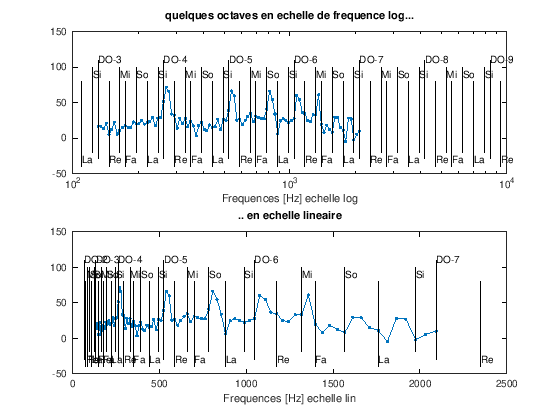

In [7]:
addpath("../../utiles");
dBde = @(gain) max(-100,20*log10(abs(gain))) ;

subplot(211) % échelle log/log comme bode
ax=semilogx(f,dBde(tfd_s),'.-'); 
title("quelques octaves en echelle de frequence log...");
xlabel("Frequences [Hz] echelle log")
hold on;
grid_notes(); % Fonction maison pour les octaves

subplot(212)% échelle lin
plot(f,dBde(tfd_s),'.-'); 
hold on;
grid_notes();
title(".. en echelle lineaire")
xlabel("Frequences [Hz] echelle lin")


## Analyse par fft
---

Utilisons l'algorithme `fft` pour afficher ces fréquences.

Attention N points temporel donnent N points en fréquentiel répartis dans $[0, F_e[$.

À vous de créer un vecteur de fréquences linéaire `f_lin` adéquat permettant d'afficher de même manière le module de la fft.



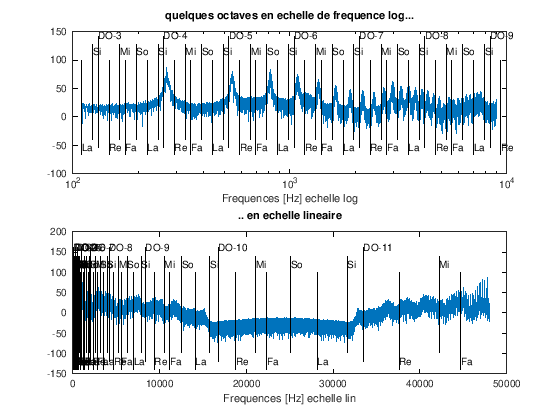

In [8]:
## VOTRE CODE Df=..., f_lin=...
df=Fe/N ;   % La résolution fréquentielle en N points
f_lin = 0:df:(Fe-df);  % Les fréquences linéaires

## VOTRE CODE fft_s= ....
# help fft  si nécessaire
# Pourquoi fft n'as pas besoin de connaitre Fe ?!
fft_s = fft(s);    

# On affiche de même le résultat mais avec l'algo fft
# Avec vos fréquences
pas_tout = round(110/df):round(9000/df);
subplot(211)
ax=semilogx(f_lin(pas_tout),dBde(fft_s(pas_tout)),'-'); 
title("quelques octaves en echelle de frequence log...");
xlabel("Frequences [Hz] echelle log")
hold on;
grid_notes();

subplot(212)
plot(f_lin,dBde(fft_s),'-'); 
hold on;
grid_notes();
title(".. en echelle lineaire")
xlabel("Frequences [Hz] echelle lin")


Remarquez alors que le spectre est symétrique par rapport à $\frac{F_e}{2}$ !

Pas étonnant car (sélectionnez la bonne expliquation) :
 - un spectre discret est $F_e/2$-périodique et peu importe que le signal soit réel 
 - un spectre discret est $F_e$-périodique et peu importe que le signal soit réel 
 - un spectre discret est $F_e$-périodique et le signal est réel donc $\hat{S}(-f)=\overline{\hat{S}(f)}$
 - un spectre discret est $F_e/2$-périodique et le signal est réel donc $\hat{S}(-f)=\overline{\hat{S}(f)}$

On peut utiliser `fftshift` pour afficher une période du spectre centrée en 0. 

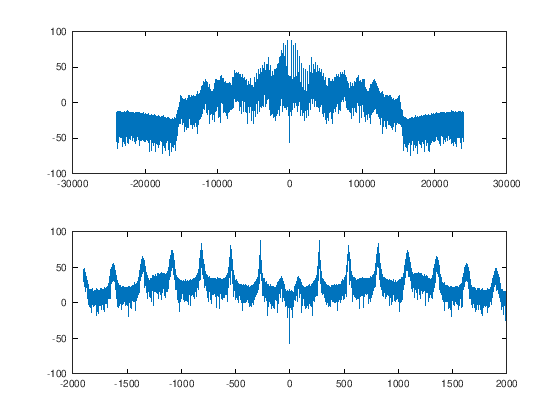

In [9]:
## VOTRE affichage avec fftshift centré autour de 0 en fréquence

f_sym = f_lin - Fe/2;
subplot(211);
plot(f_sym, fftshift(dBde(fft_s)));

subplot(212);
pas_tout = round(N/2-1900/df):round(N/2+2000/df);
plot(f_sym(pas_tout),fftshift(dBde(fft_s))(pas_tout));

## Quelle harmonique amplifier ?


  
On remarque que la **tierce majeure** donne un MI d'amplitude plus faible que les DO en harmonie et le SOL de la quinte.

On peut choisir d'amplifier soit :
  - la **quinte** pour faire un SOL encore plus fort,
  - la **tierce** qui est déjà faible pour faire apparaître un MI !

On peut d'abord ajuster le filtre continu du second ordre du tp précédent pour qu'il amplifie la **tierce** (4ᵉ harmonique, donc celle de rang 5 à la fréquence $5.F_0$) avec +/- un demi ton de sélectivité ($\zeta$ <0.1).


1) Ajustez $\omega_n$ et $\zeta$ et calculez le gain du second ordre pour les fréquences d'analyse.


> On pourra accentuer l'effet en appliquant 2 à 3 fois ce filtre !  
> Que devient la fonction de transfert et la réponse harmonique en faisnt cela ?




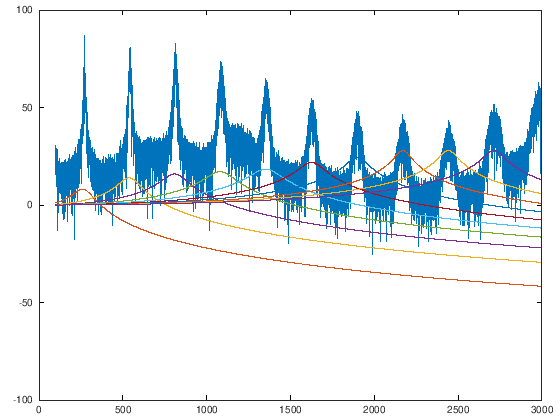

In [10]:
Gc= @(p,wn,zeta) wn^2./(p.^2 + 2*zeta*wn*p + wn^2);
p = i*2*pi*f_lin';


pas_tout = round(100/df):round(3000/df);
plot(f_lin(pas_tout),dBde(fft_s(pas_tout))); hold on;

%% On recherche le pic de fréquence autour de F0
[maxi, id_max] = max(abs(fft_s)); % la fondamentale est maximum
w0 = (id_max*df-df)  *2*pi;

puis = [1    1    1    1     1    1    1    1    1    1];
zetas = [0.2 0.1 0.08 0.07 0.06 0.04 0.03 0.02 0.02 0.02];
for rang = 1:10
    wn = rang * w0;    % on multiplie par 3 pour l'harmonique
    plot(f_lin(pas_tout),dBde(Gc(p(pas_tout),wn,zetas(rang)).^puis(rang)));
end
rang=7;
wn = w0*rang;
zeta=zetas(rang);
pow=puis(rang);

# 3 - Filtre IIR : bilinéaire
---

Choisissez de continuer en notebook ou en scripts. Faites des sauvegardes dans tous les cas.


## Continuer en notebook


> Vous pouvez continuer dans ce notebook le travail en utilisant
>   File → New Console For Notebook
>  Voir les variables en tapant "whos" dans la console
> 
> Il peut être utile de faire une copie de ce Notebook en cas de mise à jour  
>   File → Duplicate et rename  
> On peut créer un point de suavegarde sans changer de nom   
>   File → Snapshot


## Continuer avec des scripts

> Vous pouvez exporter ce notebook en scripts `.m` et continuer de travailler
> avec octave ou matlab.  
> Pour cela dans un terminal lancez la commande

```bash
./genere_les_scripts.sh
cd scripts_octave
octave --gui
```

Vous pouvez travailler avec le GUI d'octave ou Matlab, avec emacs en mode octave (ALT+X octave-mode), ou un éditeur évolué (codium, pycharm)...

## Synthèse discrète bilinéaire

Utilisez la synthèse bilinéaire pour fabriquer un filtre discret équivalent au filtre continu que vous avez ajusté.  
N'oubliez pas l'effet de compression des fréquences !

  1) Donnez la fonction de transfert 
  2) Affichez la réponse harmonique par-dessus le spectre de la voix
  3) Appliquez hors-ligne ce filtre en multipliant puis ifft
  
  2) Multipliez le spectre du signal par celui de votre second ordre pour filtrer.

3) Faites une transformée inverse et généré un fichier son du signal filtré.

Vous mettrez ainsi au point votre fonction de transfert continue pour obtenir le meilleur effet sonore.


In [11]:
fft_filt_c = fft_s .* Gc(p,wn,zeta).^pow;
y_filt_c = real(ifft(fft_filt_c));
y_filt_c = y_filt_c/max(abs(y_filt_c));
audiowrite("filt_c.wav",y_filt_c,Fe)

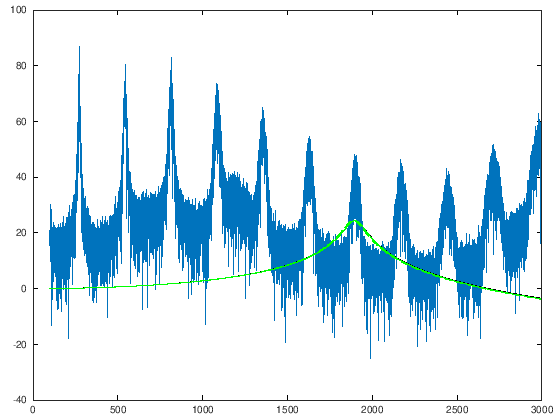

In [12]:
Gbi = @(z) 2/Te*(z-1)./(z+1);
wnpre = 2/Te*tan(wn*Te/2);
z=exp(Te*p);
Gzpre = Gc(Gbi(z),wnpre,zeta);
Gz = Gc(Gbi(z),wn,zeta);
plot(f_lin(pas_tout),dBde(fft_s(pas_tout))); hold on;
plot(f_lin(pas_tout),dBde(Gc(p(pas_tout),wn,zeta).^pow),'k');
plot(f_lin(pas_tout),dBde(Gzpre(pas_tout).^pow),'g-');
plot(f_lin(pas_tout),dBde(Gz(pas_tout).^pow),'g--');

fft_filt_z = fft_s .* Gz.^2;
y_filt_z = real(ifft(fft_filt_z));
y_filt_z = y_filt_z/max(abs(y_filt_z));
audiowrite("filt_z.wav",y_filt_z,Fe)

## 4 - Filtre IIR : récurrence (temps réel)
---

On peut calculer comme si l'on était en temps réel la réponse du filtre en faisant une fonction récursive.

La boucle suivante "simule" un temps réel où à chaque nouvel échantillon, le filtre est calculé avec ce nouveau sample et donne la valeur de la sortie.



In [13]:
function [a,b] = filt_overtone(w0,rang,Te)
    wn=2/Te*tan(rang*w0*Te/2);
    puis = [1    1    1    1     1    1    1    1    1    1]*1;
    zetas = [0.2 0.1 0.08 0.07 0.06 0.04 0.03 0.02 0.02 0.02]*1;
    zeta=zetas(rang);
    a0 = (1+4*zeta/(Te*wn)+4/(Te*wn)**2); 
    a1 = (2-8/(Te*wn)**2); 
    a2 = (1-4*zeta/(Te*wn)+4/(Te*wn)**2);

    aa = [a0, a1, a2]/a0;
    bb = [1, 2, 1]/a0;
    a=aa;
    b=bb;
    for k=2:puis(rang)
        a=conv(a,aa);
        b=conv(b,bb);
    end
end


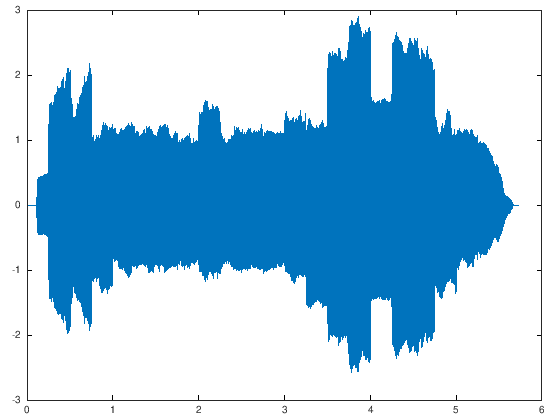

In [14]:
%% Fonction pouvant implémenter un filtre IIR de type I
% Implique la mémorisation des x et des y
% cette mémoire est accessible en général par variables globales
global mem_x
global mem_y
filtre = @filt_iir_I; % version stupide de la fonction
%% CODEZ VOTRE FONCTION dans le fichier filtre_iir_I.m


mem_x = zeros(1,15);   % mémoire du filtre vide au début
mem_y = mem_x;

%% Le vecteur des sorties à la même taille que s
rang=3;
inc=1;
y = 0*s;
a=1;
b=1;
for k = 1:N
    if (mod(k,Fe/4)==Fe/4-1)
        [a,b] = filt_overtone(w0,rang,Te);
        rang = rang + inc ;
        if (rang>9)
            inc = -inc;
        end
        if (rang<3)
            inc = -inc;
        end
    end
    y(k) = filtre(s(k),b,a);    
end

plot(t,y)
y = y /max(abs(y));
audiowrite("filt_rec.wav",y,Fe)

In [15]:
!./genere_les_scripts.sh

on sauve les fichiers .m existants de ./scripts_octave


ls: impossible d'accéder à '*.m': Aucun fichier ou dossier de ce type





On  génère les .m à partir des .ipynb dans ./scripts_octave


[NbConvertApp] Converting notebook tp2_overtone_corr.ipynb to script

[NbConvertApp] Writing 6721 bytes to scripts_octave/tp2_overtone_corr.m

Pour voir les sauvegardes
ls -a ./scripts_octave

Pour nettoyer les sauvegardes faites
rm ./scripts_octave/.sauv.*



In [21]:
!aplay ana_ah.wav

Lecture WAVE 'ana_ah.wav' : Signed 16 bit Little Endian, Fréquence 48000 Hz, Stéréo


